In [8]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("dataset/Data_for_UCI_named.csv")

In [10]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [12]:
to_drop = ['stab']
df = df.drop(to_drop, axis=1)

# Understanding the Dataset

In [13]:
df.describe(include="number")

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


<AxesSubplot: title={'center': 'Unique values per feature'}>

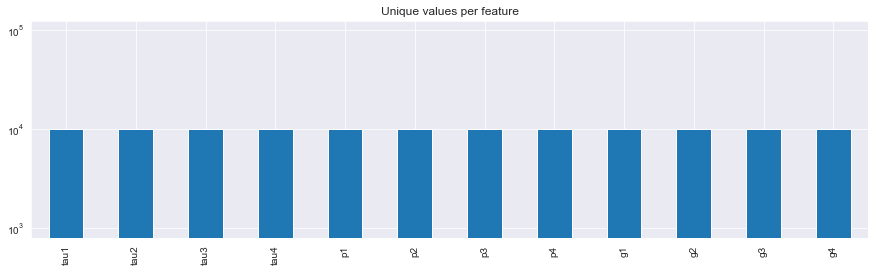

In [14]:
#For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

#plot information with y-axis in log scale
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

In [15]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=["stabf"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


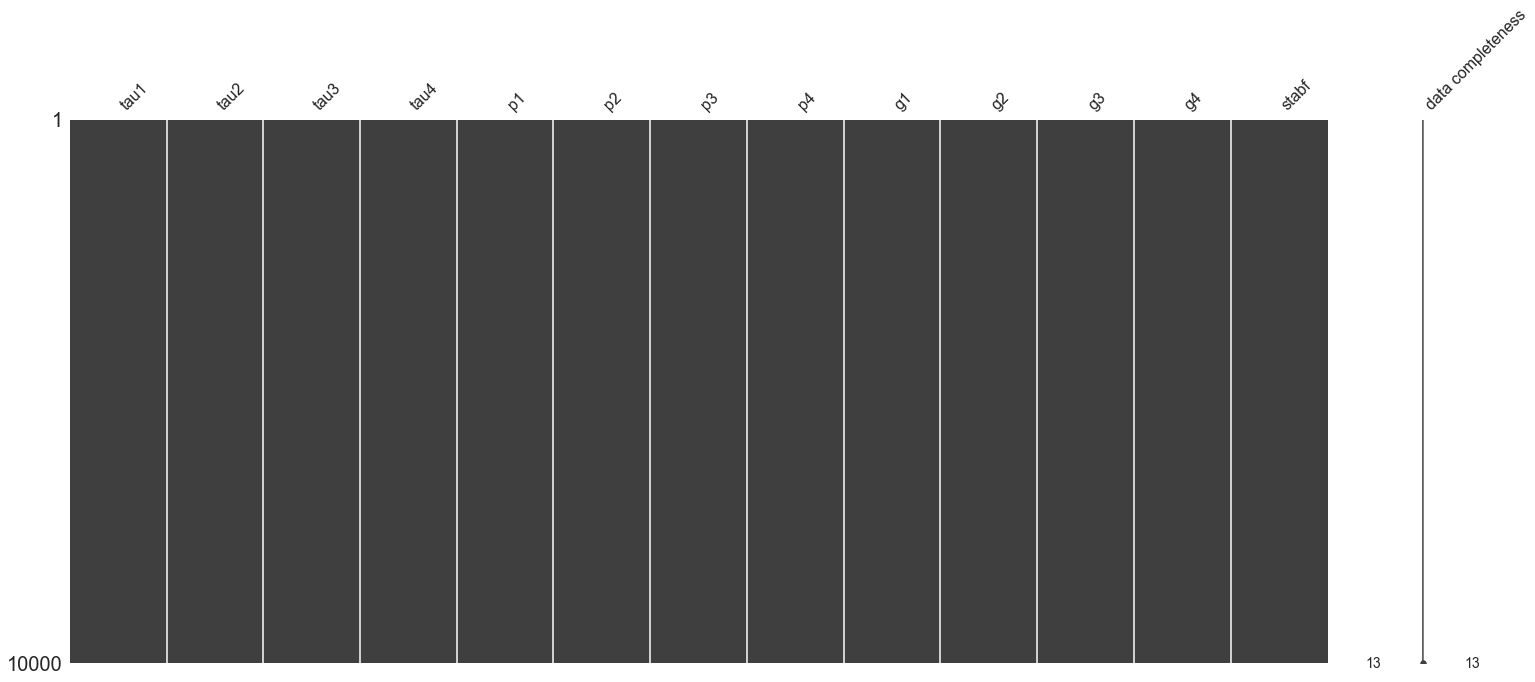

In [16]:
#Check missing values

import missingno as msno

msno.matrix(df, labels=True, sort="descending");

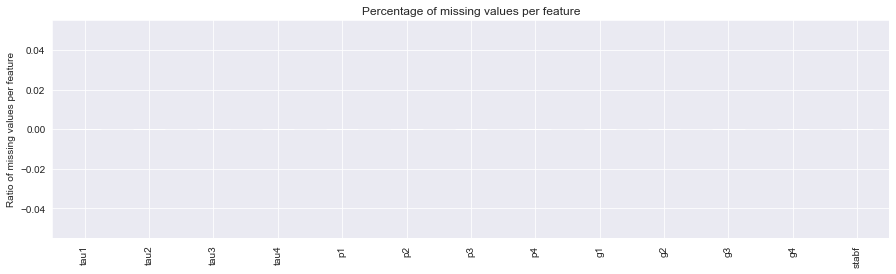

In [17]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

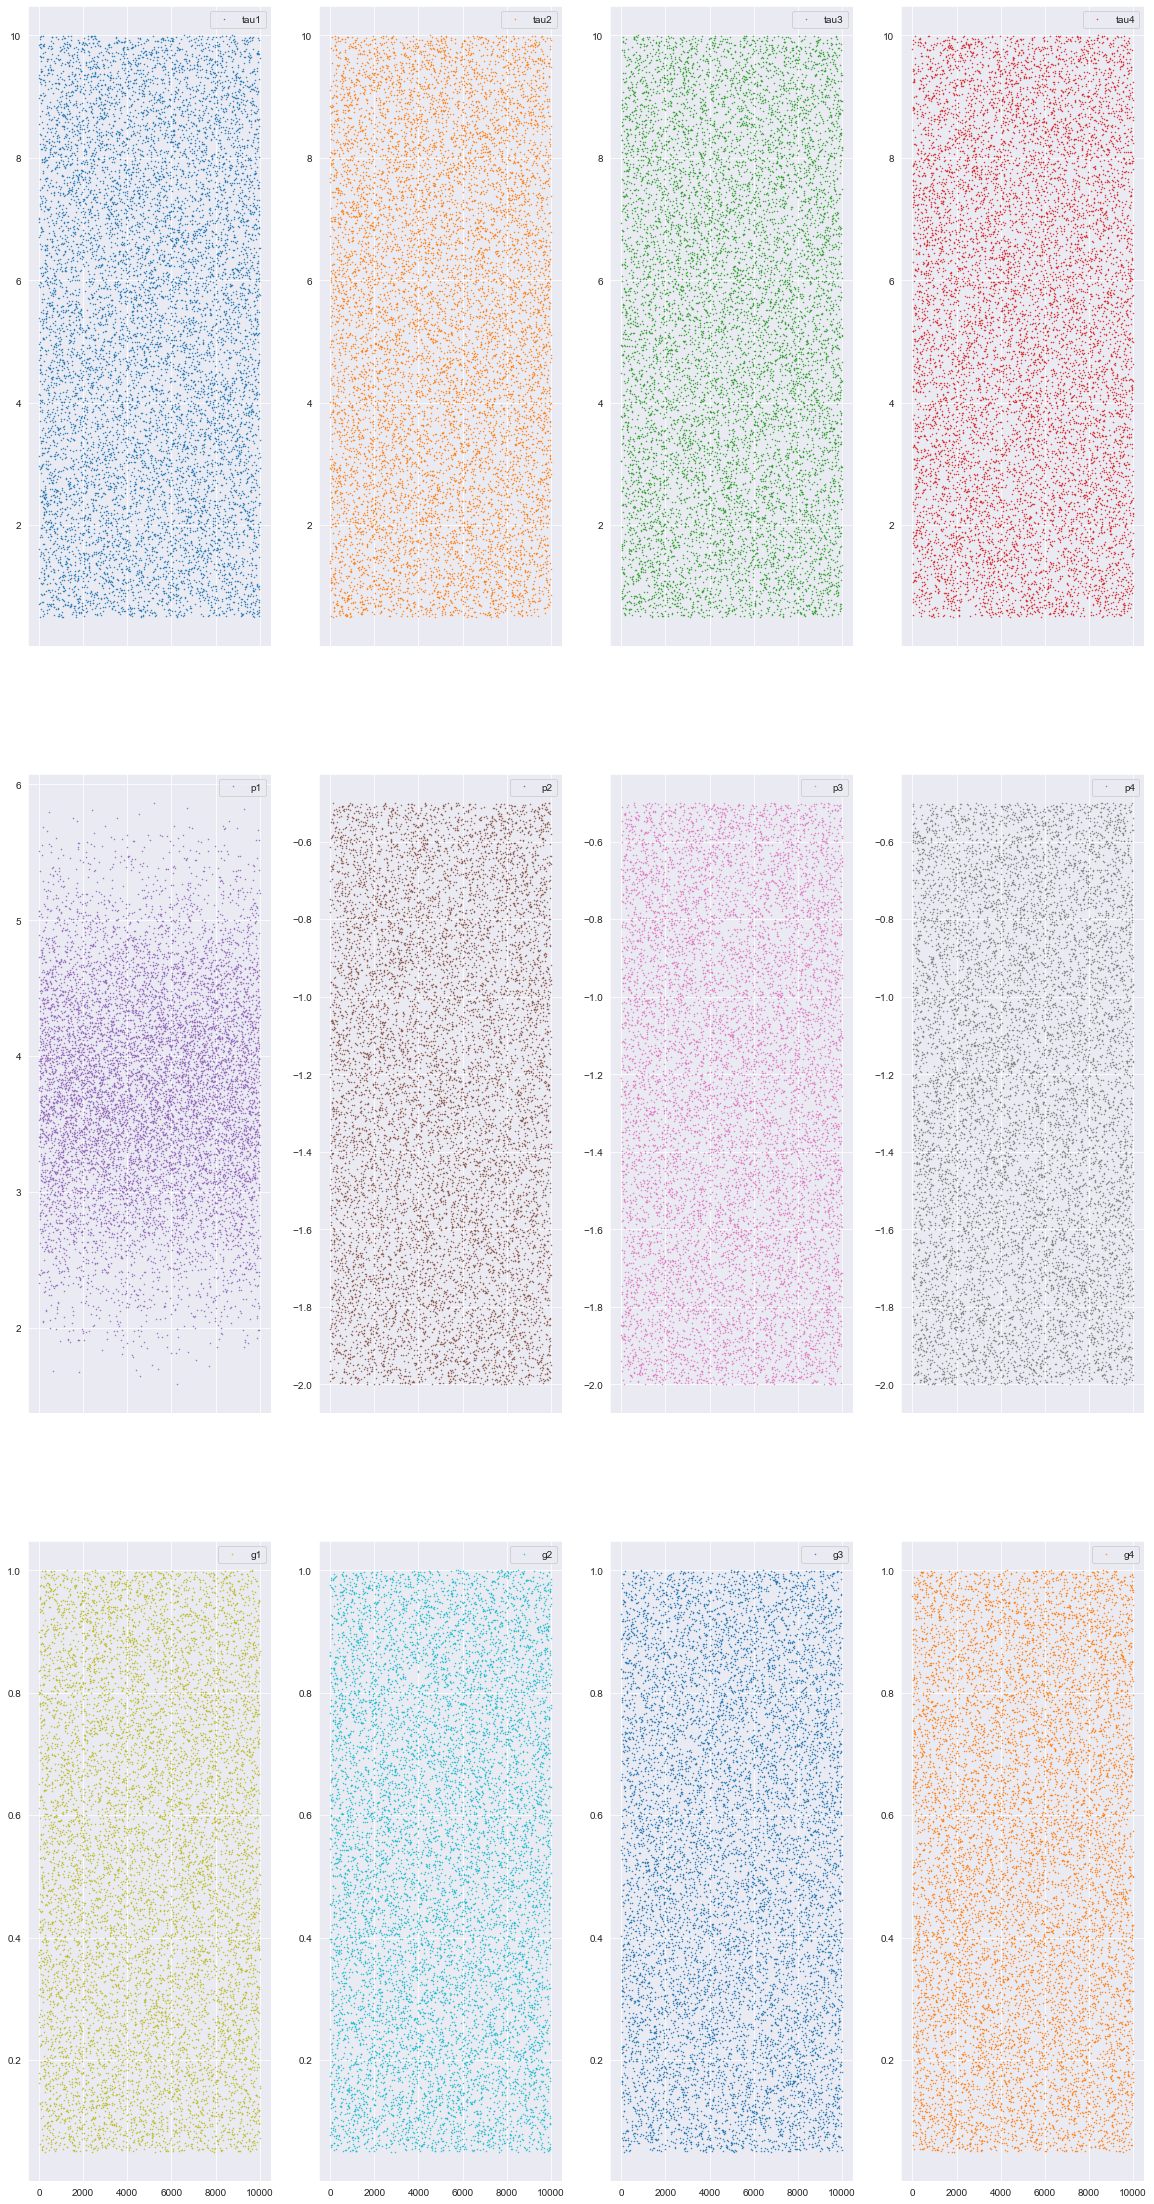

In [18]:
df.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(20, 40),
          markersize=1);

# y-axis = feature values
# x-axis = sample index

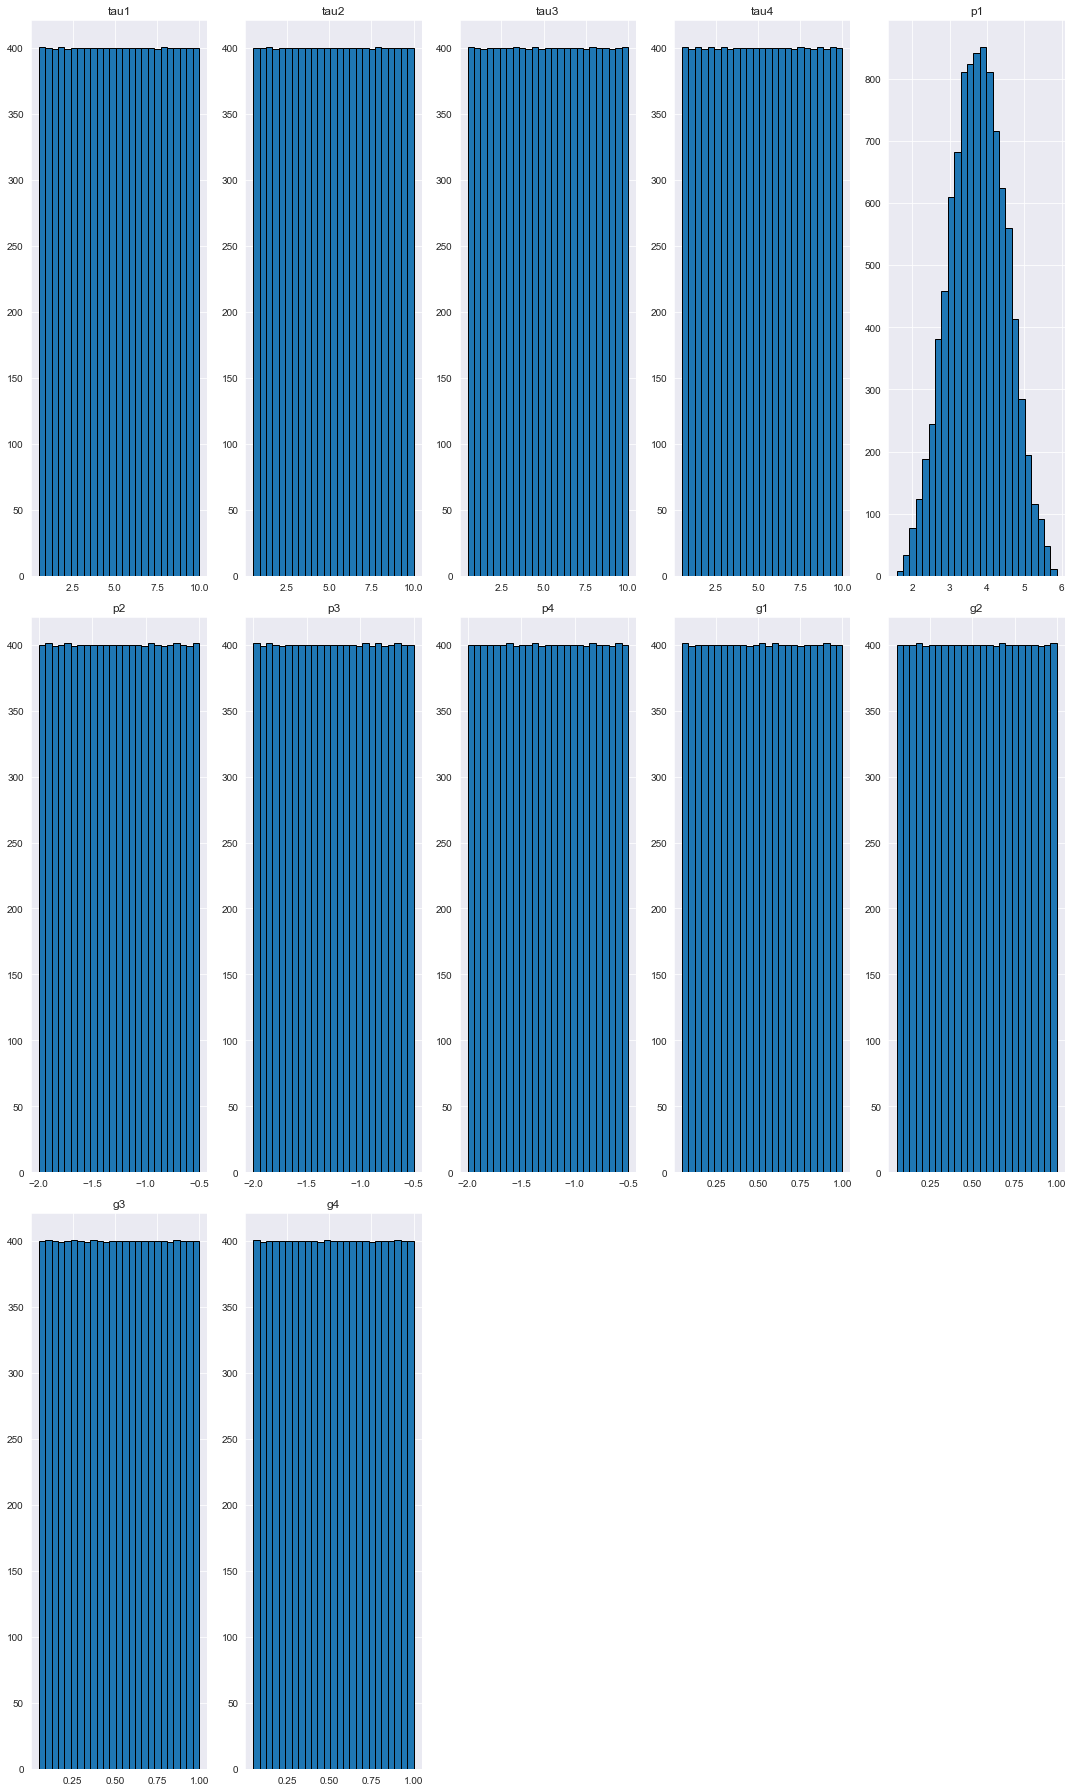

In [19]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

# Machine Learning

In [20]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [21]:
#Assigning X and y
X = df.drop(columns='stabf', axis=1)
y = df['stabf']

In [36]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1, stratify=y)
y_train.value_counts()

unstable    5104
stable      2896
Name: stabf, dtype: int64

## Baseline - Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Measuring Classification Performance of Logistic Regression

In [24]:
#Confusion Matrix

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)
cnf_mat

array([[ 493,  219],
       [ 175, 1113]], dtype=int64)

In [25]:
#Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 80


In [26]:
#Precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 74


In [27]:
#Recall
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 69


In [28]:
#F1-Score
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 71


## With SMOTE (implementing my autoML)

In [29]:
import time
from tqdm.notebook import tqdm

In [52]:
def auto_ml(X, y, models_dict, scaler=None, cv=None, res_t=None):
    """Apply resampling for imbalanced data"""
    results = {}
    results2 = {}

    # log start time
    total_start = time.time()

    for model_name, model in tqdm(models_dict.items()):

        ################# this portion can be edited ###############
        train_scores = []
        val_scores = []

        #train_recall = []
        #val_recall = []

        ###########################################################

        for train_index, val_index in tqdm(cv.split(X, y)):

            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Apply scaling
            if scaler is not None:
                X_train = scaler.fit_transform(X_train)
                X_val = scaler.transform(X_val)
            else:
                pass

            # Apply resampling
            if res_t is not None:
                s = time.time()
                X_train, y_train = res_t.fit_resample(X_train, y_train)
                print(f'Resampling done in {time.time() - s}')
            else:
                pass

            start_time = time.time()

            # fit
            model.fit(X_train, y_train)

            # predict
            #train_preds = model.predict(X_train)
            #val_preds = model.predict(X_val)

            ################# this portion can be edited ###############

            # classification accuracy
            train_scores.append(model.score(X_train, y_train))
            val_scores.append(model.score(X_val, y_val))

            # recall
            #train_recall.append(recall_score(y_train, train_preds))
            #val_recall.append(recall_score(y_val, val_preds))

            end_time = time.time()

            results[model_name] = {
                'Train Accuracy': np.round(np.mean(train_scores) * 100, 2),
                'Val Accuracy': np.round(np.mean(val_scores) * 100, 2),
                #'Train Recall': np.round(np.mean(train_recall) * 100, 2),
                #'Val Recall': np.round(np.mean(val_recall) * 100, 2),
                'Run Time': end_time - start_time
            }

            results2[model_name] = {
                'Train Accuracy': '{:.2f}%'.format(np.round(np.mean(train_scores)*100, 2)),
                'Val Accuracy': '{:.2f}%'.format(np.round(np.mean(val_scores)*100, 2)),
                #'Train Recall': '{:.2f}%'.format(np.round(np.mean(train_recall)*100, 2)),
                #'Val Recall': '{:.2f}%'.format(np.round(np.mean(val_recall)*100, 2)),
                'Run Time': end_time - start_time
            }

            ###########################################################

    results = pd.DataFrame(results).T
    results2 = pd.DataFrame(results2).T
    return [results, results2]

In [38]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier)
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import (SMOTE)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (StratifiedKFold)

In [39]:
models_dict = {'RandomForestClassifier': RandomForestClassifier(random_state=1),
               'ExtraTreesClassifier': ExtraTreesClassifier()
              }

In [53]:
auto_run = auto_ml(x_train, y_train, models_dict, scaler=MinMaxScaler(),
               cv=StratifiedKFold(n_splits=5))
auto = auto_run[0]
auto_run[1]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Run Time
RandomForestClassifier,100.00%,91.72%,2.230266
ExtraTreesClassifier,100.00%,92.30%,0.722242


# Using XGBoost and LightGBM